Import necessary libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt

Symmetry Breaking Problem:

    If all neurons in a layer start with the same weights, they will compute the same outputs and gradients.
    This leads to redundant neurons, preventing the network from learning diverse features.
    Proper weight initialization helps break symmetry and improve training convergence.

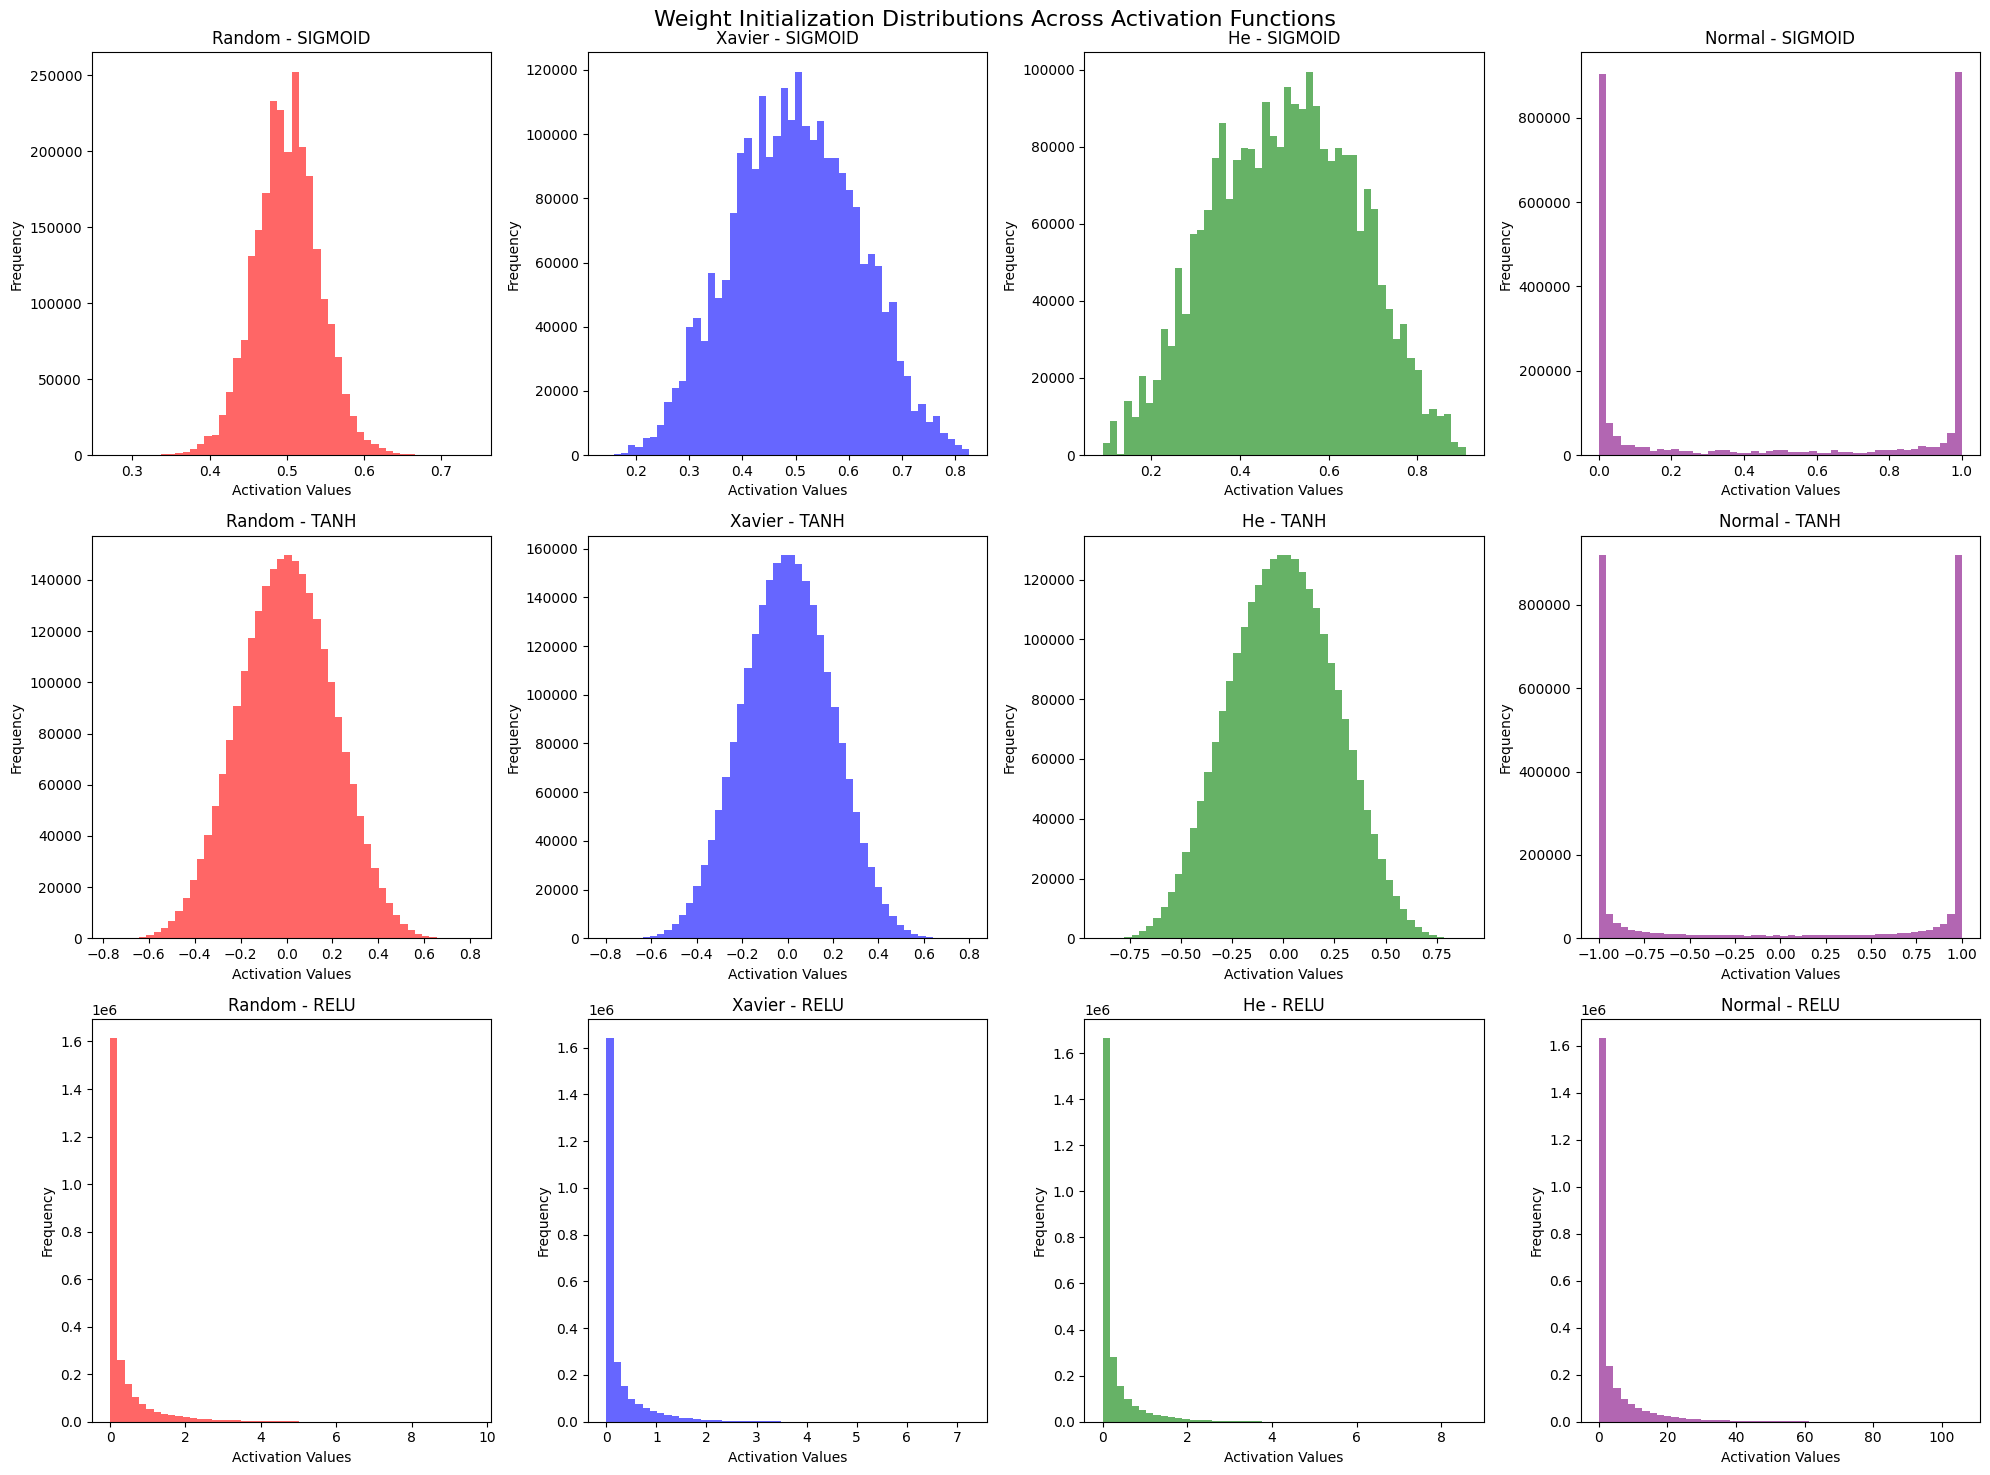

In [9]:
def weight_initialization():
    """
    This function initializes weights using different strategies and visualizes their distributions
    for different activation functions in a single combined histogram for each initialization.
    """
    num_samples = 1000  # Number of input data points
    input_dim = 500  # Dimensionality of input data
    hidden_layer_sizes = [500] * 5  # 5 hidden layers with 500 neurons each
    activations = ['sigmoid', 'tanh', 'relu']  # Three activation functions
    init_types = ['random', 'xavier', 'he', 'normal']  # Four weight initialization strategies

    # Generate input data from a Gaussian distribution
    D = np.random.randn(num_samples, input_dim)
    Hs = {act: {init: [] for init in init_types} for act in activations}

    for act in activations:
        X = D  # Input data
        for i in range(len(hidden_layer_sizes)):
            fan_in = X.shape[1]
            fan_out = hidden_layer_sizes[i]

            # Different weight initialization strategies
            random_init = np.random.randn(fan_in, fan_out) * 0.01  # Small random values
            xavier_init = np.random.randn(fan_in, fan_out) / np.sqrt(fan_in)  # Xavier/Glorot initialization
            he_init = np.random.randn(fan_in, fan_out) / np.sqrt(fan_in / 2)  # He initialization
            normal_init = np.random.randn(fan_in, fan_out)  # Standard normal

            # Activation functions
            activation = {
                'sigmoid': lambda x: 1 / (1 + np.exp(-x)),
                'tanh': lambda x: np.tanh(x),
                'relu': lambda x: np.maximum(0, x)
            }[act]

            # Compute activations for each initialization
            for init, W in zip(init_types, [random_init, xavier_init, he_init, normal_init]):
                H = activation(np.dot(X, W))
                Hs[act][init].append(H.flatten())
                X = H  # Feed-forward to the next layer

    # Visualization: 12 Histograms (4 weight strategies × 3 activation functions)
    fig, axes = plt.subplots(3, 4, figsize=(20, 15))
    fig.suptitle("Weight Initialization Distributions Across Activation Functions", fontsize=16)
    colors = ['red', 'blue', 'green', 'purple']  # Different colors for better visualization

    for i, act in enumerate(activations):
        for j, init in enumerate(init_types):
            ax = axes[i, j]
            ax.hist(np.concatenate(Hs[act][init]), bins=50, alpha=0.6, color=colors[j])
            ax.set_title(f"{init.capitalize()} - {act.upper()}")
            ax.set_xlabel("Activation Values")
            ax.set_ylabel("Frequency")

    plt.tight_layout()
    plt.show()

# Run function
weight_initialization()